In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# DATA EXPLORATION -KPIs

### Review the Data

In [62]:
df = pd.read_csv('bank-additional/bank-additional-full.csv',sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Define attribute

In [10]:
df_category = df.select_dtypes(include='O')
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [11]:
df_category

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [12]:
df_numeric = df.select_dtypes(include=[int,float])
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


In [13]:
df_numeric

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


### univariate analysis

### Numerical type 

In [64]:
df.shape

(41188, 21)

In [15]:
for col in df_numeric:
    print(f'Summary statistics for {col}:')
    print(df_numeric[col].describe())
    
    Q1 = np.quantile(df_numeric[col].dropna(), 0.25)
    Q3 = np.quantile(df_numeric[col].dropna(), 0.75)
    IQR = Q3 - Q1
    
    print(f'IQR for {col}: {IQR}')
    print(f'Variance for {col}: {df_numeric[col].var()}')
    print(f'Skewness for {col}: {df_numeric[col].skew()}')
    print(f'Kurtosis for {col}: {df_numeric[col].kurtosis()}')
    print(f'Standard deviation for {col}: {df_numeric[col].std()}')
    upper_outlier = df[df_numeric[col] > (Q3 +1.5*IQR)].shape[0]
    print(f'Number of upper ouliers for {col}: {upper_outlier}')
    lower_outlier = df[df_numeric[col] < (Q1 -1.5*IQR)].shape[0]
    print(f'Number of lower ouliers for {col}: {lower_outlier}')
    outliers_per=((upper_outlier+lower_outlier)/df_numeric.shape[0])*100
    print(f'% of outliers of {col}: {outliers_per} %')
    print('------------------------------------------------------------')

Summary statistics for age:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
IQR for age: 15.0
Variance for age: 108.60245116512178
Skewness for age: 0.7846968157646645
Kurtosis for age: 0.7913115311544336
Standard deviation for age: 10.421249980934235
Number of upper ouliers for age: 469
Number of lower ouliers for age: 0
% of outliers of age: 1.1386811692726035 %
------------------------------------------------------------
Summary statistics for duration:
count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
IQR for duration: 217.0
Variance for duration: 67225.72887720143
Skewness for duration: 3.263141255262832
Kurtosis for duration: 20.247938014978796
Standard deviation for duration: 259.2

### -> Percentage of previous outlier is the most, Following are duration,age and campaign

## Univariate analysis 

### Age

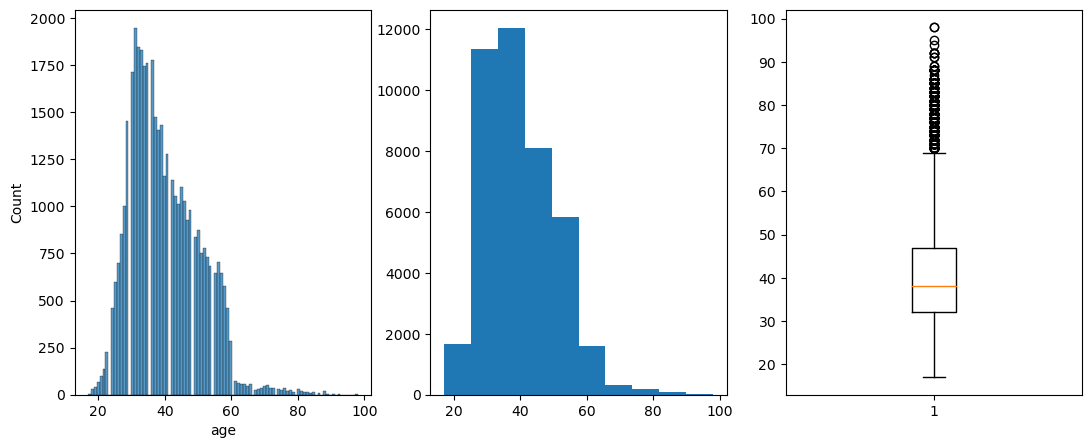

In [17]:
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
sns.histplot(df_numeric['age'])
plt.subplot(1,3,2)
plt.hist(df_numeric['age'])
plt.subplot(1,3,3)
plt.boxplot(df_numeric['age'])
plt.show()

#### Age has many outliers, from 70 to 100 years old,data is at most at 40 years old

### Campaign

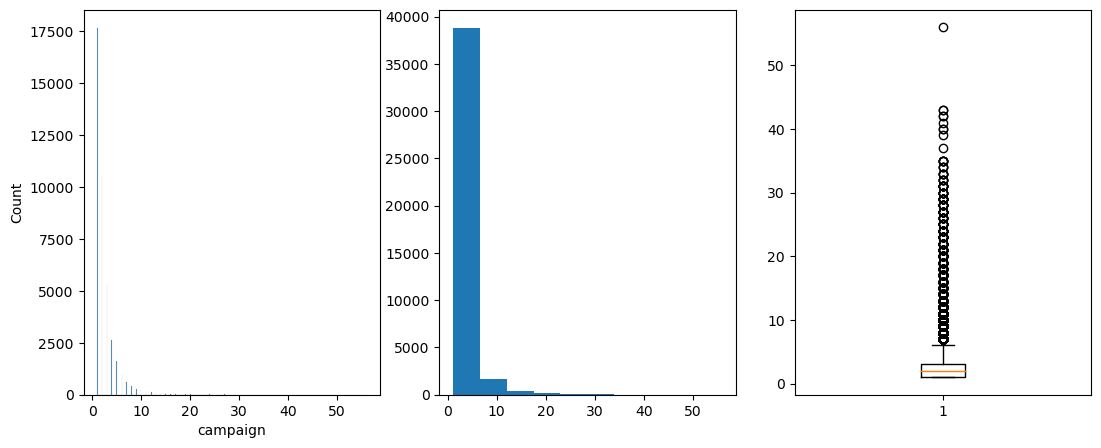

In [18]:
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
sns.histplot(df_numeric['campaign'])
plt.subplot(1,3,2)
plt.hist(df_numeric['campaign'])
plt.subplot(1,3,3)
plt.boxplot(df_numeric['campaign'])
plt.show()

#### Campaign has outliers from 8 to 45 ,data is at most at 0

### Previous

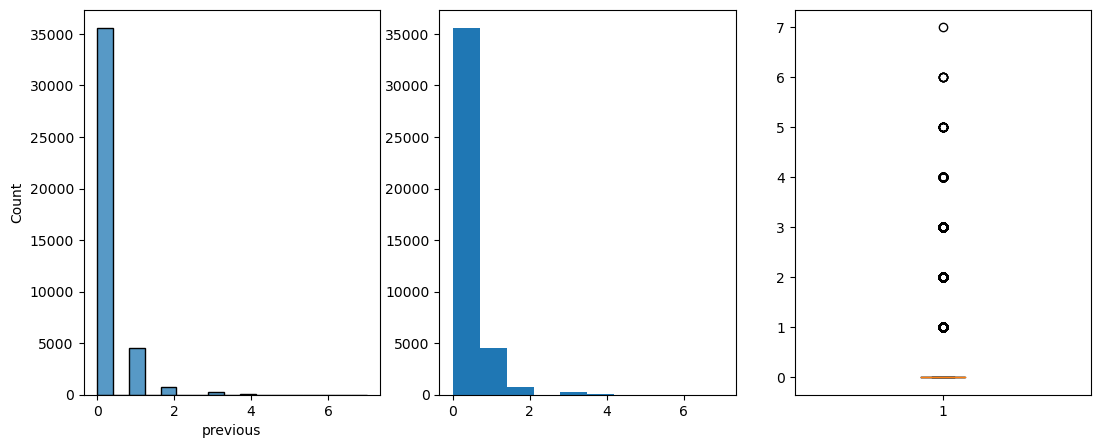

In [19]:
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
sns.histplot(df_numeric['previous'])
plt.subplot(1,3,2)
plt.hist(df_numeric['previous'])
plt.subplot(1,3,3)
plt.boxplot(df_numeric['previous'])
plt.show()

#### Previous has campaign from 1 to 7 ,data is at most at 0

### Categorical Variables 

In [20]:
df_category.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [21]:
category_value_counts = {}
for col in df_category :
    value_count = df_category[col].value_counts().sort_index()
    category_value_counts[col]=value_count
    print(f'values count for {col} :')
    print(value_count)
    print('---------------------------------')

values count for job :
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
Name: job, dtype: int64
---------------------------------
values count for marital :
divorced     4612
married     24928
single      11568
unknown        80
Name: marital, dtype: int64
---------------------------------
values count for education :
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
Name: education, dtype: int64
---------------------------------
values count for default :
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
---------------------------------
values count for 

Text(0.5, 1.0, 'job')

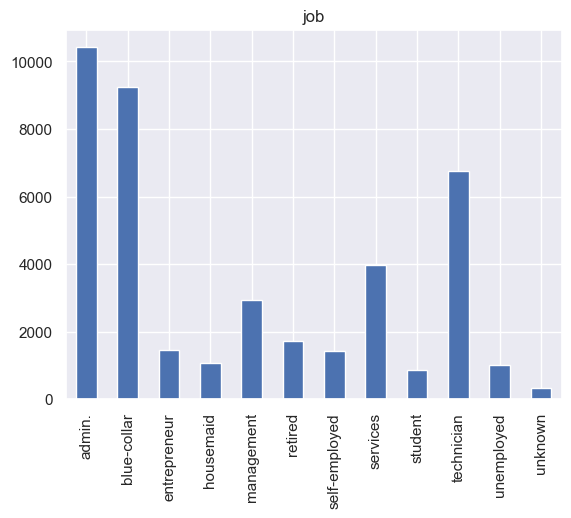

In [22]:
sns.set()
category_value_counts['job'].plot.bar()
plt.title('job')

#### Admin, technican and blue-collar majors accounted for the majority, in addition to unknown, students accounted for the lowest compared to the rest of the professions.

Text(0.5, 1.0, 'marital')

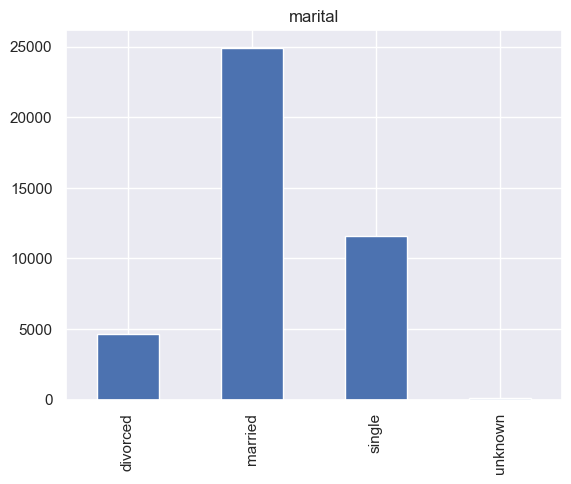

In [23]:
sns.set()
category_value_counts['marital'].plot.bar()
plt.title('marital')

#### Married rate is the largest in the data, twice as much as single

Text(0.5, 1.0, 'education')

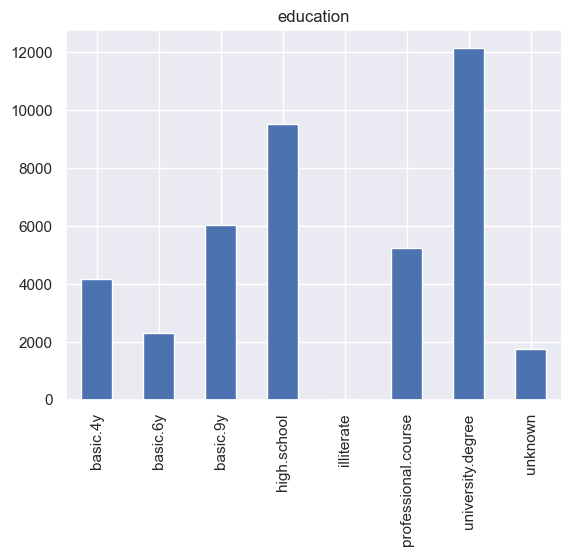

In [24]:
sns.set()
category_value_counts['education'].plot.bar()
plt.title('education')

#### The percentage of people who have a university degree and graduate from high school is the largest in the data set, in addition, the percentage of people who are illiterate is absent.

Text(0.5, 1.0, 'y')

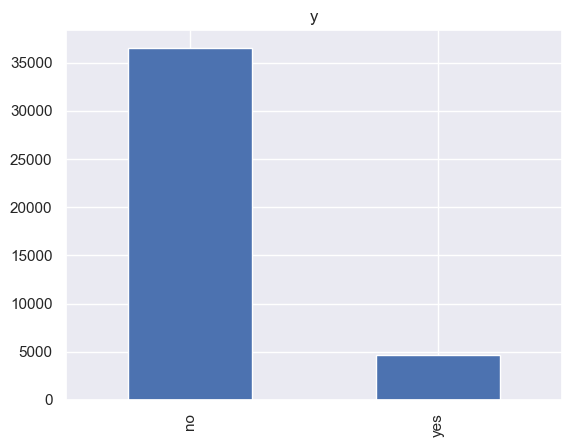

In [25]:
sns.set()
category_value_counts['y'].plot.bar()
plt.title('y')

#### People who agree to sign up for a deposit account have a very low occupancy period in the customer file, about 5000 people, accounting for about 8%

### Multivariate analysis


#### Numeric & Numeric

In [26]:
df_numeric[['age','duration','campaign','pdays','previous']].corr()

,age,duration,campaign,pdays,previous
age,1.000000,-0.000866,0.004594,-0.034369,0.024365
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000


#### The above variables do not have a linear relationship with each other

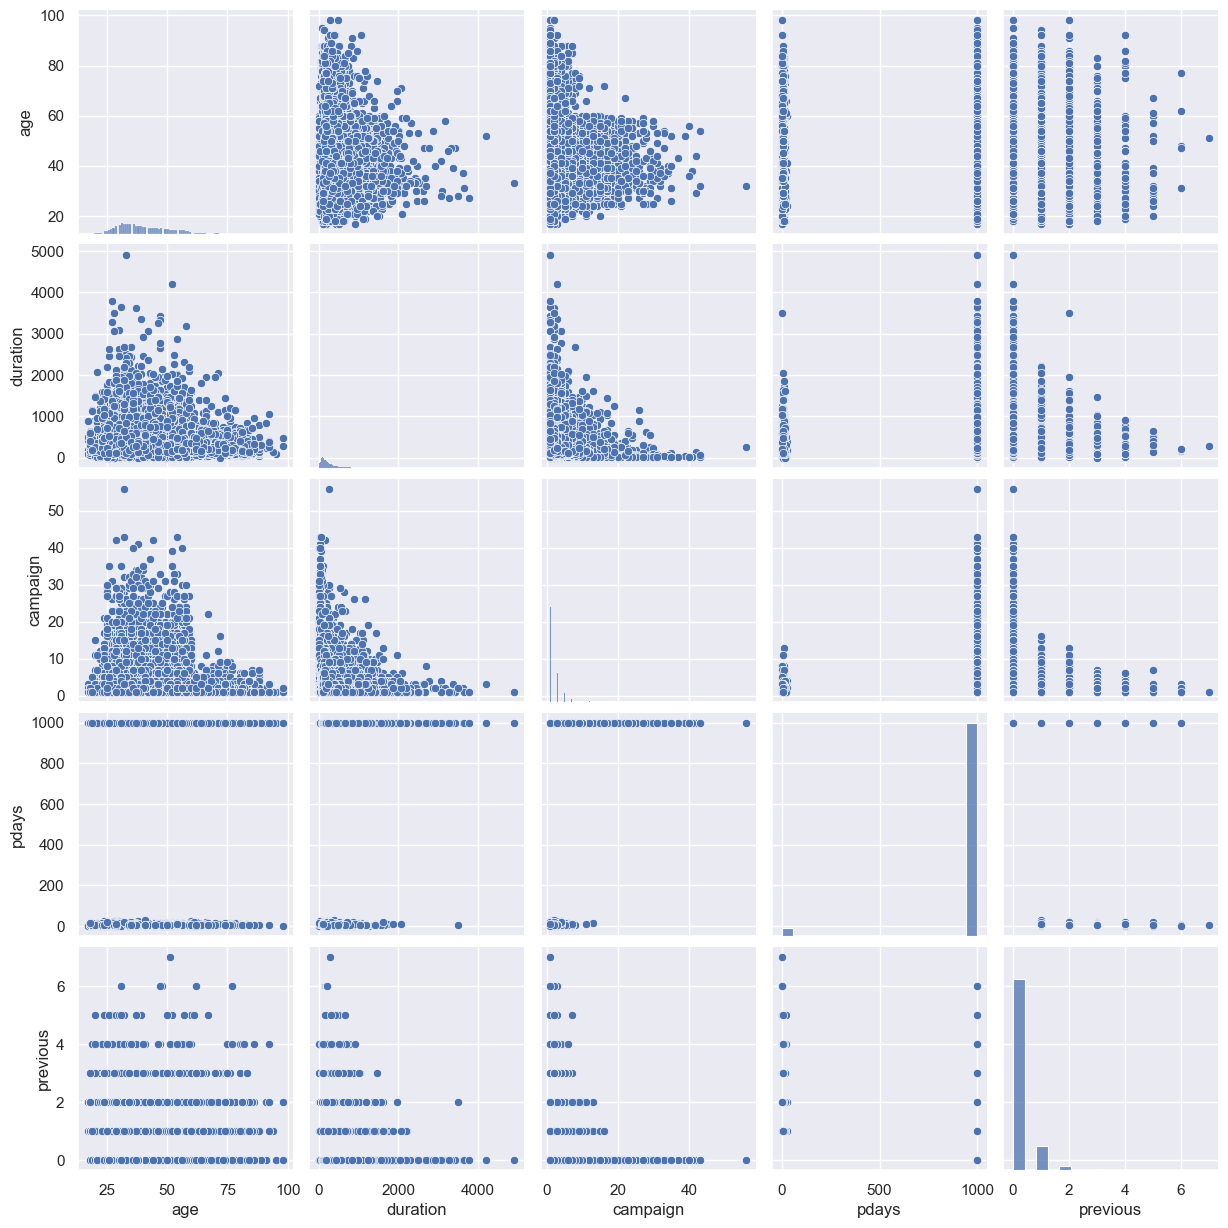

In [27]:
sns.pairplot(df_numeric[['age','duration','campaign','pdays','previous']])
plt.show()

### Categorical & Categorical

In [28]:
df_category

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


### JOB AND EDUCATION

In [29]:
table = pd.crosstab(df.job,df.education)
table

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


<Axes: xlabel='job'>

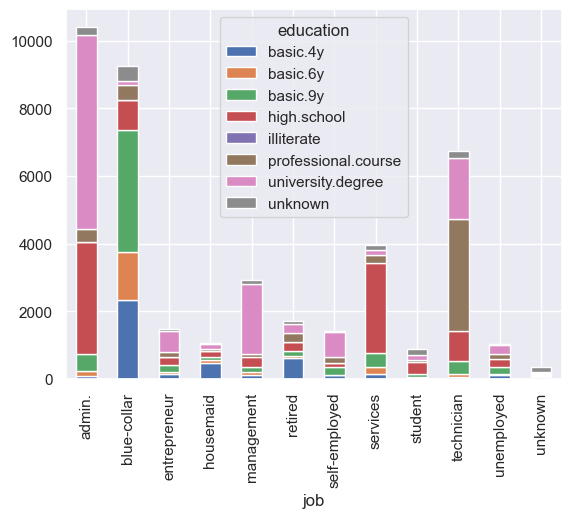

In [30]:
table.plot(kind='bar',stacked=True)

#### People who do the jobs that make up the majority of the data are mostly people with university degrees, and very few people complete professional courses, in addition, the majority of people with 4y bases work in the field of blue-collar

In [219]:
##### T test

In [31]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [32]:
stat,p,dof , expected = chi2_contingency(table)
print('dof=',dof)
print('p= ',p)

dof= 77
p=  0.0


In [33]:
prob = 0.95
alpha = 1 - prob
critical = chi2.ppf(prob,dof)
print('probability=',prob,'critical=',critical,'stat=',stat)

probability= 0.95 critical= 98.48438345934042 stat= 37338.1351562161


In [34]:
if p <= alpha:
    print('2 variables depend (Reject Ho)')
else:
    print('2 variables independ (Accept Ho)')

2 variables depend (Reject Ho)


#### JOB AND EDUCATION ARE DEPENDENCE

### Job And Conversion

In [35]:
table2 = pd.crosstab(df.job,df.y)
table2

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


<Axes: xlabel='job'>

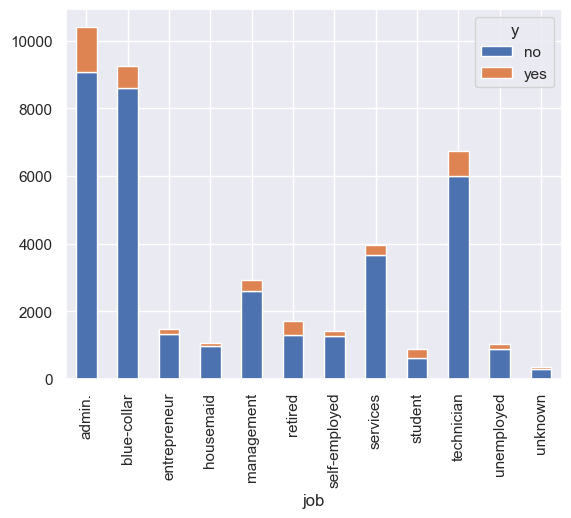

In [222]:

table2.plot(kind='bar',stacked=True)

#### The majority of people who agree to sign up for a term deposit are admin and technican, in addition, oriental medicine people make up the least housemaid

In [223]:
stat2,p2,dof2 , expected2 = chi2_contingency(table2)
print('dof2=',dof2)
print('p2= ',p2)

dof2= 11
p2=  4.189763287563623e-199


In [224]:
prob = 0.95
alpha = 1 - prob
critical = chi2.ppf(prob,dof2)
print('probability=',prob,'critical=',critical,'stat=',stat2)

probability= 0.95 critical= 19.67513757268249 stat= 961.2424403289555


In [225]:
if p2 <= alpha:
    print('2 variables depend (Reject Ho)')
else:
    print('2 variables independ (Accept Ho)')

2 variables depend (Reject Ho)


#### Job and Conversion are mutually dependent

### Education And Conversion

In [221]:
table3 = pd.crosstab(df.education,df.y)
table3

y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


<Axes: xlabel='education'>

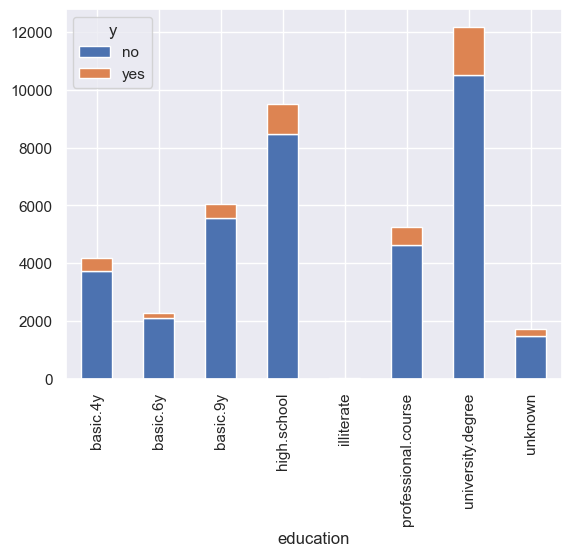

In [38]:
table3.plot(kind='bar',stacked=True)

#### Those who have a university degree are those who agree to send money, in addition, the lowest percentage of people who agree is on a 6y basis

In [43]:
stat3,p3,dof3 , expected3 = chi2_contingency(table3)
print('dof3=',dof3)
print('p3= ',p3)

dof3= 7
p3=  3.3051890144025054e-38


In [44]:
prob = 0.95
alpha = 1 - prob
critical = chi2.ppf(prob,dof3)
print('probability=',prob,'critical=',critical,'stat=',stat3)

probability= 0.95 critical= 14.067140449340169 stat= 193.10590454149565


if p3 <= alpha:
    print('2 variables depend (Reject Ho)')
else:
    print('2 variables independ (Accept Ho)')

#### Education and Conversion are mutually dependent

### Housing And Conversion


In [46]:
table4 = pd.crosstab(df.housing,df.y)
table4

y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


<Axes: xlabel='housing'>

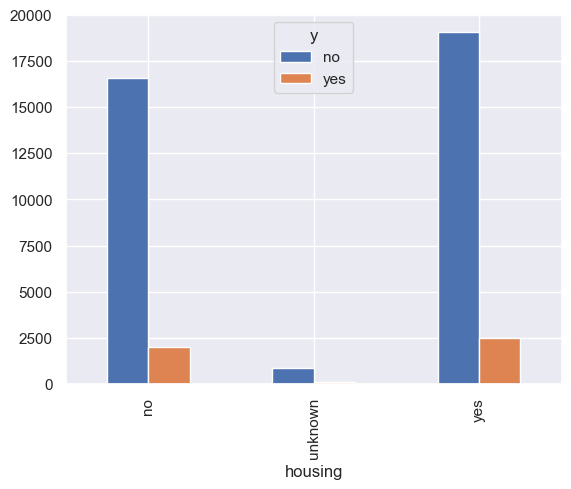

In [47]:
table4.plot(kind='bar',stacked=False)

#### The number of people who agree and play when they are not there are not much different

In [48]:
stat4,p4,dof4 , expected4 = chi2_contingency(table4)
print('dof4=',dof4)
print('p4= ',p4)

dof4= 2
p4=  0.05829447669453452


In [49]:
prob = 0.95
alpha = 1 - prob
critical = chi2.ppf(prob,dof4)
print('probability=',prob,'critical=',critical,'stat=',stat4)

probability= 0.95 critical= 5.991464547107979 stat= 5.684495858974168


In [50]:
if p4 <= alpha:
    print('2 variables depend (Reject Ho)')
else:
    print('2 variables independ (Accept Ho)')

2 variables independ (Accept Ho)


#### Housing and Conversion are mutually dependent

#### Numeric vs Category

In [51]:
df_temp = pd.concat([df_category, df_numeric], axis=1)
df_temp

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,...,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,...,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,...,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,...,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,...,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,...,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,...,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,...,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,...,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


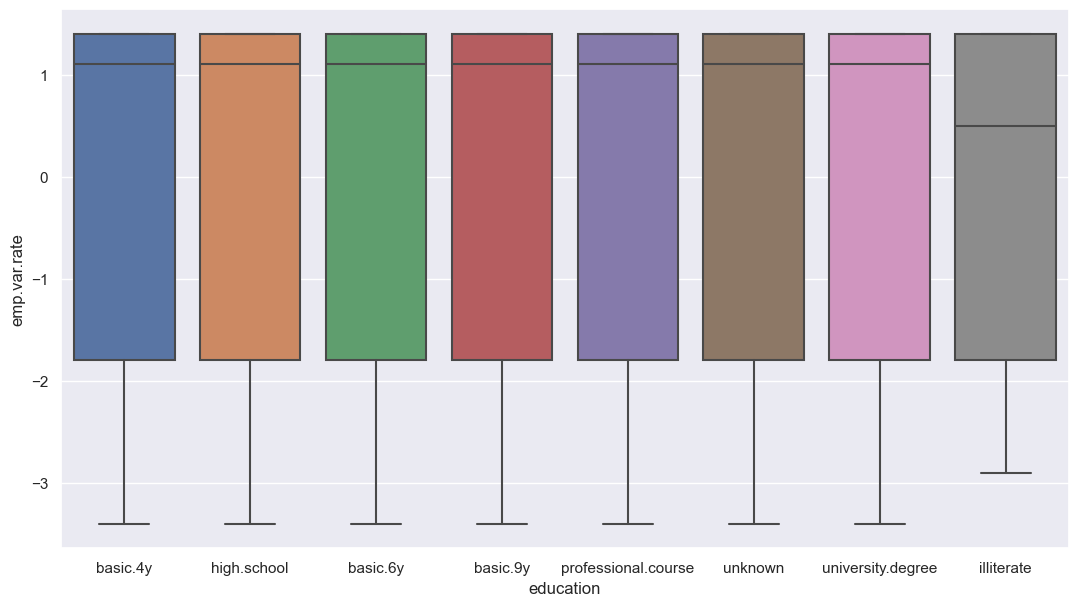

In [52]:
plt.figure(figsize=(13,7))
sns.boxplot(data=df_temp, x='education', y='emp.var.rate')
plt.show()

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [54]:
df_sub = df[['education','age']]
df_sub

,education,age
0,basic.4y,56
1,high.school,57
2,high.school,37
3,basic.6y,40
4,high.school,56
...,...,...
41183,professional.course,73
41184,professional.course,46
41185,university.degree,56
41186,professional.course,44


In [55]:
df['cons.price.idx']

0        93.994
1        93.994
2        93.994
3        93.994
4        93.994
          ...  
41183    94.767
41184    94.767
41185    94.767
41186    94.767
41187    94.767
Name: cons.price.idx, Length: 41188, dtype: float64

In [56]:
formula = 'Q("emp.var.rate")~ C(education)'
model = ols(formula, data=df_temp).fit()

In [57]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq       df          F        PR(>F)
C(education)     377.499930      7.0  21.929606  8.505778e-30
Residual      101268.494842  41180.0        NaN           NaN


In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog  = df_temp['emp.var.rate'],
                           groups = df_temp['education'],
                           alpha  = 0.05)
print(m_comp)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
           basic.4y            basic.6y   0.0152    1.0 -0.1083  0.1388  False
           basic.4y            basic.9y  -0.0567 0.6226 -0.1523   0.039  False
           basic.4y         high.school   -0.183    0.0 -0.2712 -0.0948   True
           basic.4y          illiterate  -0.3493 0.9818  -1.472  0.7735  False
           basic.4y professional.course  -0.0429 0.8918 -0.1415  0.0557  False
           basic.4y   university.degree   -0.244    0.0 -0.3293 -0.1588   True
           basic.4y             unknown  -0.1568 0.0111 -0.2927  -0.021   True
           basic.6y            basic.9y  -0.0719 0.5721 -0.1885  0.0447  False
           basic.6y         high.school  -0.1982    0.0 -0.3088 -0.0876   True
           basic.6y          illiterate  -0.3645  0.

#### The above results from Tukey HSD show that some pairs (False) : accept Ho, other pairwise comparisons reject Ho and show statistically significant differences

### handle missing data

In [59]:
df.isna().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [60]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Drop outliers

In [124]:
df_for_drop_outliers = df[['age','duration','campaign','pdays','previous','cons.conf.idx']]

In [97]:
for col in df_for_drop_outliers:
    df_shape= df.shape
    print(f'Before drop for {col} : {df_shape}')
    Q1 = np.quantile(df_numeric[col].dropna(), 0.25)
    Q3 = np.quantile(df_numeric[col].dropna(), 0.75)
    IQR = Q3 - Q1
    df_now = df[(df_for_drop_outliers[col] < Q3 + 1.5*IQR)]
    df_now_shape= df_now.shape
    print(f'After drop for {col}:{df_now_shape}')
    mean1 = df[col].mean(skipna=True)
    print(f'Mean of {col} Before : {mean1}')
    mean2 =df_now[col].mean(skipna=True)
    print(f'Mean of {col} After : {mean2}')
    df_for_drop_outliers[col] = df_now[col]

    print('-------------------------------')
    print('----------------')

Before drop for age : (41188, 21)
After drop for age:(40719, 21)
Mean of age Before : 40.02406040594348
Mean of age After : 39.599007834180604
-------------------------------
----------------
Before drop for duration : (41188, 21)
After drop for duration:(38225, 21)
Mean of duration Before : 258.2850101971448
Mean of duration After : 203.25483322432962
-------------------------------
----------------
Before drop for campaign : (41188, 21)
After drop for campaign:(37803, 21)
Mean of campaign Before : 2.567592502670681
Mean of campaign After : 1.9417506547099437
-------------------------------
----------------
Before drop for pdays : (41188, 21)
After drop for pdays:(1515, 21)
Mean of pdays Before : 962.4754540157328
Mean of pdays After : 6.014521452145215
-------------------------------
----------------
Before drop for previous : (41188, 21)
After drop for previous:(0, 21)
Mean of previous Before : 0.17296299893172767
Mean of previous After : nan
-------------------------------
--------

### Part 2 - Analyze data from depositors with other variables

#### Calculate conversion rate

In [129]:
df['conversion'] = df['y'].apply(lambda x : 1 if x =='yes' else 0)

In [130]:
print('total conversion: %i out of %i' % (df.coversion.sum(),df.shape[0]))

total conversion: 4640 out of 41188


In [131]:
print('conversion rate: %0.2f%%' % (df.coversion.sum()/df.shape[0] * 100 ))

conversion rate: 11.27%


In [149]:
conversions_by_age =df.groupby(by='age')['conversion'].sum() / df.groupby(by='age')['conversion'].count()*100

In [150]:
conversions_by_age

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: conversion, Length: 78, dtype: float64

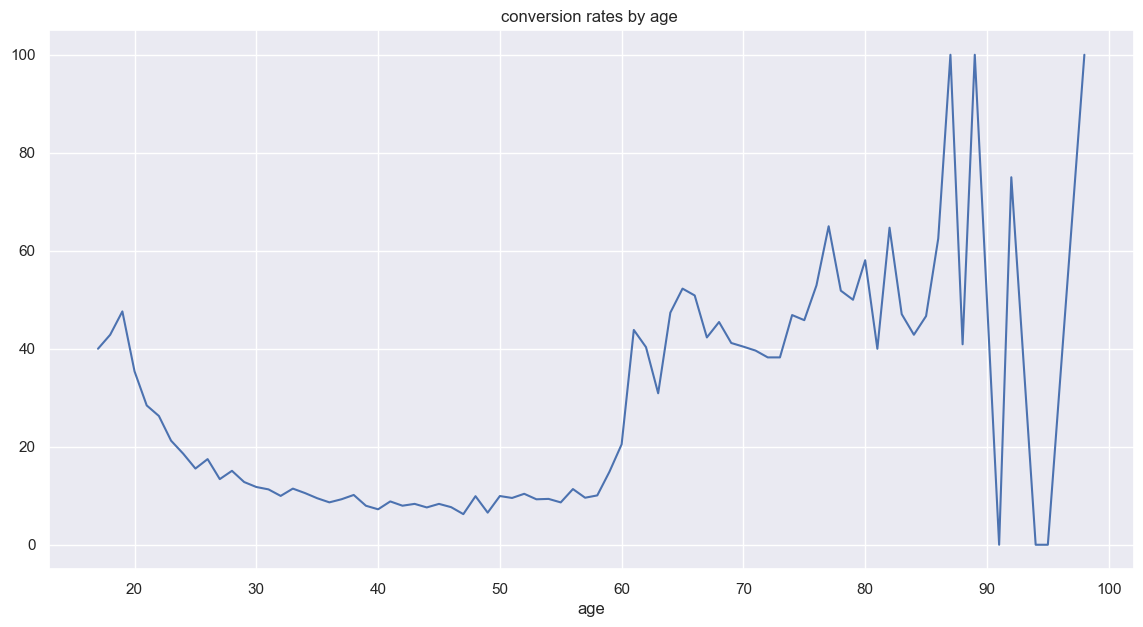

In [151]:
conversions_by_age.plot(grid= True,figsize=(14,7),title = 'conversion rates by age ')
plt.show()

#### The expected rate of depositors in the age variable fluctuates low from the age of 20 to 60, and there is a flutuation trend from the age of 60 onwards, strongly fluctuates from the age of 85 to 96

In [159]:
df['age_group']= df['age'].apply(lambda x : '[18,30)' if x < 30 else '[30,40)' if x < 
                                 40 else '[40,50)' if x < 50 else '[50,60)' if x <60
                              else '[60,70)' if x <70 else '70+' )

In [160]:
conversions_by_age_group =df.groupby(by='age_group')['conversion'].sum() / df.groupby(by='age_group')['conversion'].count()*100

In [161]:
conversions_by_age_group

age_group
70+        47.121535
[18,30)    16.263891
[30,40)    10.125162
[40,50)     7.923238
[50,60)    10.157389
[60,70)    34.668508
Name: conversion, dtype: float64

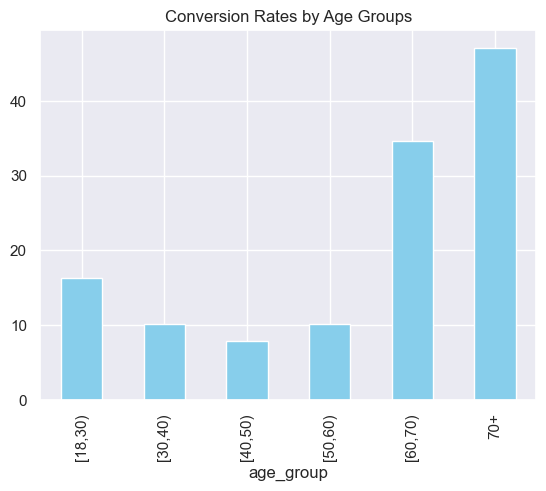

In [170]:
conversions_by_age_group.loc[['[18,30)','[30,40)','[40,50)','[50,60)','[60,70)','70+']].plot(
kind='bar',grid=True,title='Conversion Rates by Age Groups',color='skyblue')
plt.show()

#### Those who agree to deposit with a maximum term of 60 years old and above (3 times more than other ages) and the lowest at the age of 40 and 50

### Relationship between marital and conversion

In [173]:
df.groupby(['marital','y'])['conversion'].count()

marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
Name: conversion, dtype: int64

In [176]:
conversions_by_material_status_df= pd.pivot_table(df,values='y',index='marital',columns='conversion',aggfunc=len)
conversions_by_material_status_df

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [177]:
conversions_by_material_status_df.columns =['non_conversion','conversion']
conversions_by_material_status_df

,non_conversion,conversion
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


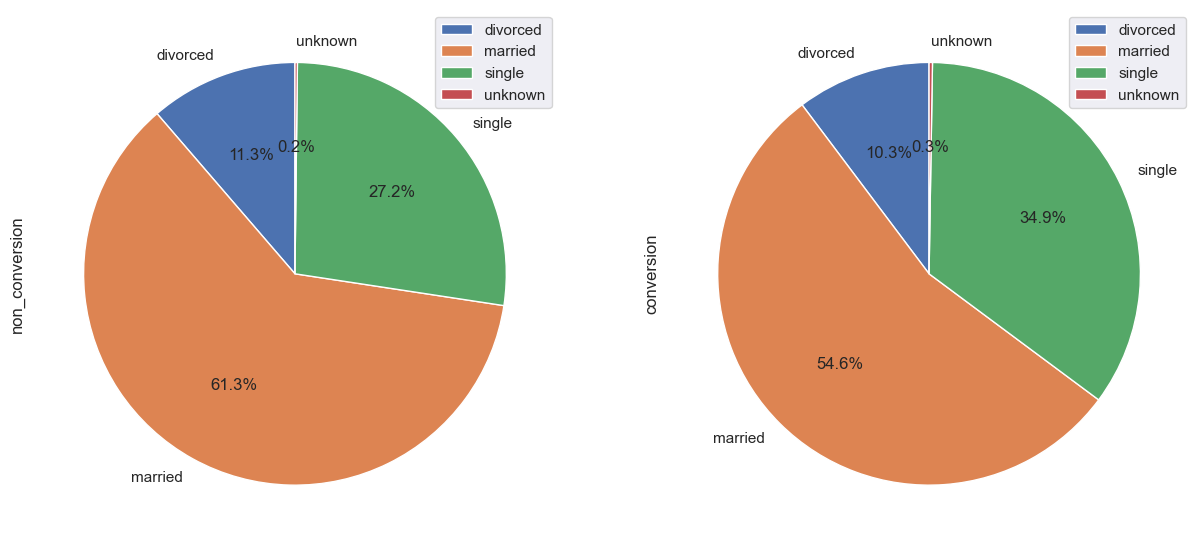

In [185]:
conversions_by_material_status_df.plot(kind='pie',
                                     figsize=(15,7),startangle=90,
                                     subplots=True,
                                     autopct=lambda x:'%0.1f%%'% x)
plt.show()

#### Conversion and Non Conversion rates in Material Status are not significantly different, the majority in both data is married and the lowest is divorced

### Relationship between age group, marital and conversion

In [189]:
age_marital_df = df.groupby(['age_group','marital'])['conversion'].sum().unstack('marital').fillna(0)

In [190]:
age_marital_df = age_marital_df.divide(df.groupby(by='age_group')['conversion'].count(),axis=0)

In [191]:
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18,30)",0.002117,0.027871,0.132475,0.000176
"[30,40)",0.007557,0.052958,0.040383,0.000354
"[40,50)",0.011970,0.054627,0.012350,0.000285
"[50,60)",0.017342,0.077674,0.006412,0.000146
"[60,70)",0.037293,0.301105,0.006906,0.001381


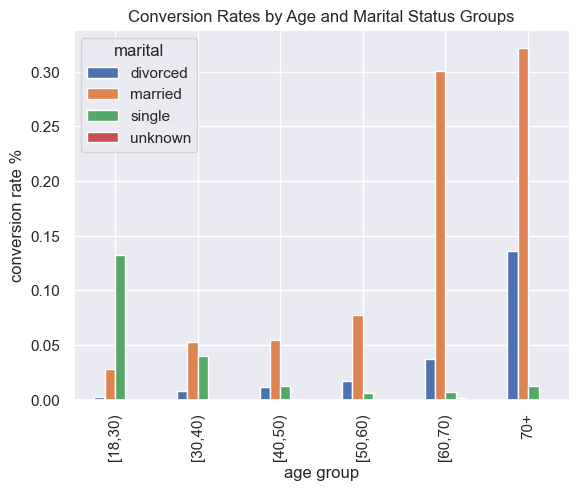

In [193]:
ax = age_marital_df.loc[['[18,30)','[30,40)','[40,50)','[50,60)','[60,70)','70+']].plot(
kind='bar',grid=True,title='Conversion Rates by Age and Marital Status Groups')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate %')
plt.show()

#### The percentage of people who are married and agree to deposit with term accounts for the majority and is mainly over 60 years old, in addition, the conversion rate of single people under 30 years old also accounts for a good proportion. much (about 14%)

### Relationship betwwen Education and Conversion 

In [194]:
df.groupby(['education','y'])['conversion'].count()

education            y  
basic.4y             no      3748
                     yes      428
basic.6y             no      2104
                     yes      188
basic.9y             no      5572
                     yes      473
high.school          no      8484
                     yes     1031
illiterate           no        14
                     yes        4
professional.course  no      4648
                     yes      595
university.degree    no     10498
                     yes     1670
unknown              no      1480
                     yes      251
Name: conversion, dtype: int64

In [195]:
conversions_by_education_status_df= pd.pivot_table(df,values='y',index='education',columns='conversion',aggfunc=len)
conversions_by_education_status_df.columns =['non_conversion','conversion']

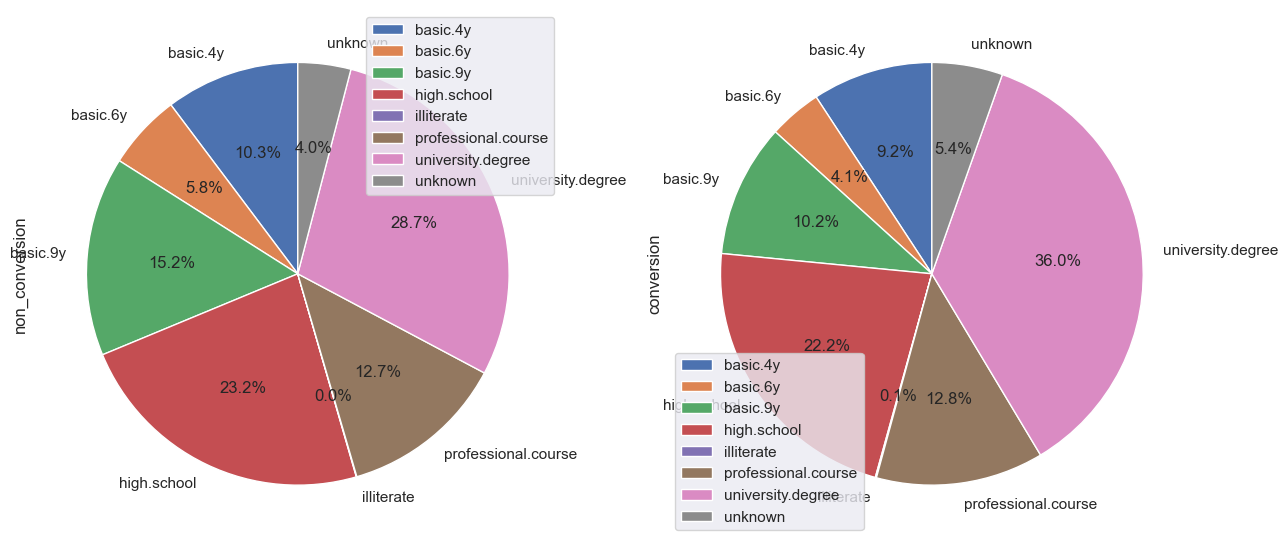

In [196]:
conversions_by_education_status_df.plot(kind='pie',
                                     figsize=(15,7),startangle=90,
                                     subplots=True,
                                     autopct=lambda x:'%0.1f%%'% x)
plt.show()

#### Majority of those who agree to switch have a university degree and the percentages agree and disagree are not much different when compared in education

In [201]:
age_education_df = df.groupby(['age_group','education'])['conversion'].sum().unstack('education').fillna(0)

In [202]:
age_education_df = age_education_df.divide(df.groupby(by='age_group')['conversion'].count(),axis=0)
age_education_df

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
age_group,,,,,,,,
70+,0.255864,0.010661,0.014925,0.025586,0.002132,0.044776,0.049041,0.068230
"[18,30)",0.003175,0.003881,0.019404,0.054331,0.000000,0.017111,0.052919,0.011819
"[30,40)",0.002480,0.004664,0.009623,0.021608,0.000059,0.014169,0.045814,0.002834
"[40,50)",0.005320,0.005130,0.009405,0.017481,0.000095,0.010355,0.027076,0.004370
"[50,60)",0.018216,0.003352,0.012970,0.016030,0.000146,0.013553,0.032789,0.004518
"[60,70)",0.092541,0.006906,0.006906,0.070442,0.000000,0.048343,0.084254,0.037293


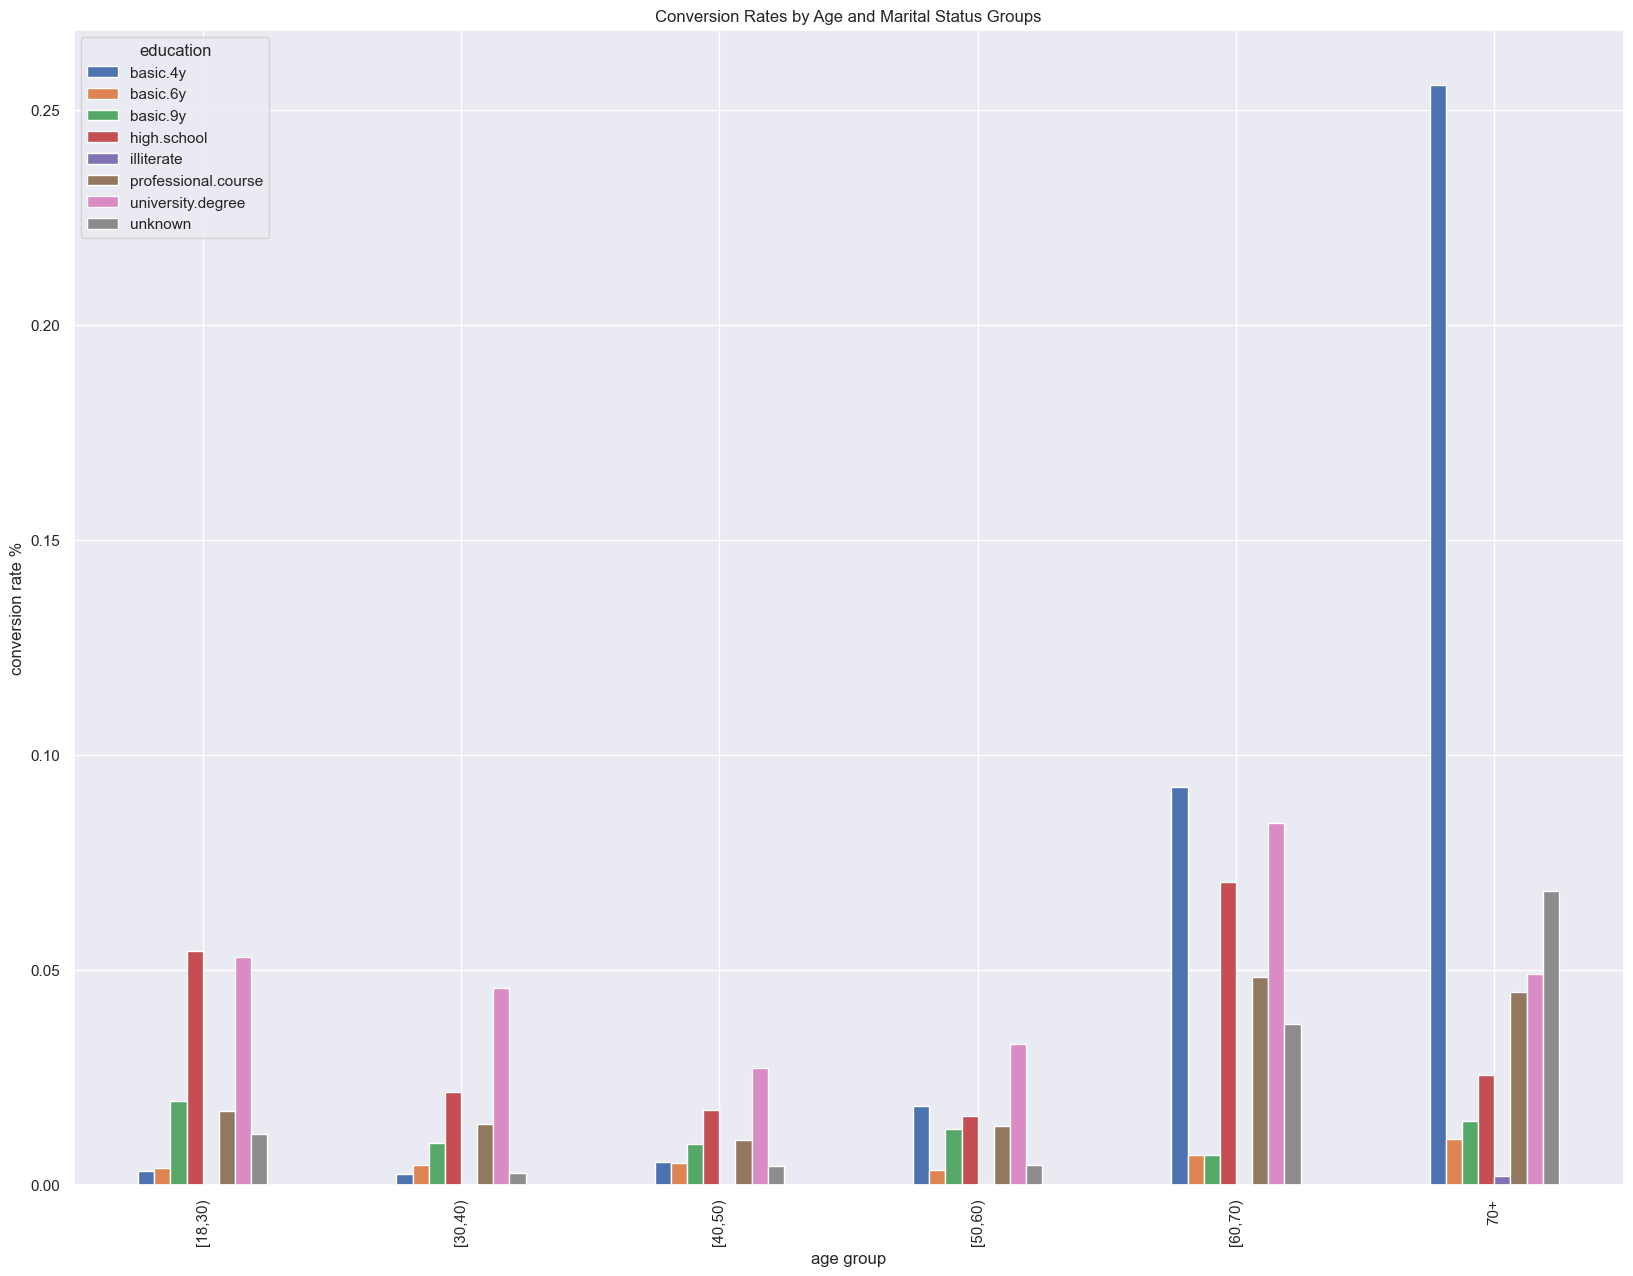

In [205]:
ax = age_education_df.loc[['[18,30)','[30,40)','[40,50)','[50,60)','[60,70)','70+']].plot(
kind='bar',grid=True,title='Conversion Rates by Age and Marital Status Groups',figsize=(20,15))
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate %')
plt.show()

#### People over 70 years old and basic 4y have the highest conversion rate compared to other data, about 2 times that of people aged 60-70

### Relationship between Contact and conversion

In [207]:
df.groupby(['contact','y'])['conversion'].count()
conversions_by_contact_status_df= pd.pivot_table(df,values='y',index='contact',columns='conversion',aggfunc=len)
conversions_by_contact_status_df.columns =['non_conversion','conversion']


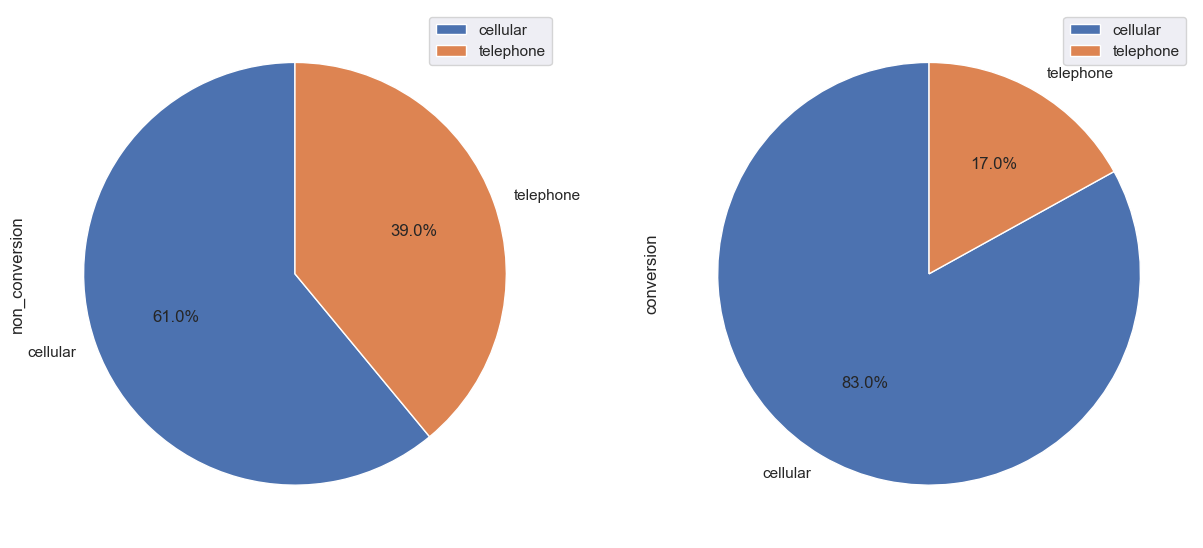

In [208]:
conversions_by_contact_status_df.plot(kind='pie',
                                     figsize=(15,7),startangle=90,
                                     subplots=True,
                                     autopct=lambda x:'%0.1f%%'% x)
plt.show()

#### Cellular users tend to decline the most and also agree to send the most term, in addition, telephone usage rates in agreeing are less than half that of external telephone users. non conversion